# Install libraries

In [2]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


# Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


# load Data

In [5]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

# Data exploration

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
# df.head(3)
# df.tail(3)
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
786,787,1,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,3101265,7.4958,NaN,S
285,286,0,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,NaN,C
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.0500,NaN,S
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data processing

In [33]:
missing_values = df.isnull().sum()
filtered_df = missing_values [missing_values  > 0]
filtered_df = pd.DataFrame(filtered_df)
filtered_df

,0
Age,177
Cabin,687
Embarked,2


<Axes: >

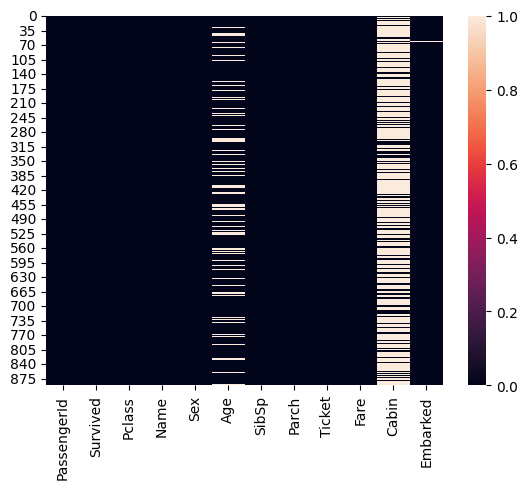

In [41]:
sns.heatmap(df.isnull())

<Axes: >

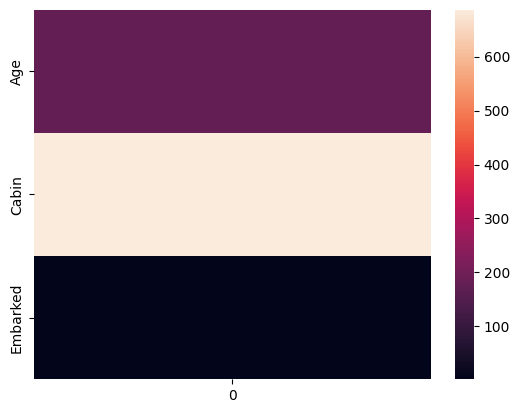

In [47]:
sns.heatmap(filtered_df)

In [51]:
def clean(d):
  d.drop(["Name","Cabin","Ticket","Fare","Embarked"],axis = 1 ,inplace = True)
  d.Age = df.Age.fillna(df.Age.mean())
  d.dropna()
clean(df)

In [65]:
for column in df.columns:
    try:
        df[column] = df[column].fillna(0)
        df[column] = df[column].astype('int64')
    except ValueError:
        print(f"Convert column {column} to int64")

print(df)
print(df.dtypes)

Convert column Sex to int64
     PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch
0              1         0       3    male   22      1      0
1              2         1       1  female   38      1      0
2              3         1       3  female   26      0      0
3              4         1       1  female   35      1      0
4              5         0       3    male   35      0      0
..           ...       ...     ...     ...  ...    ...    ...
886          887         0       2    male   27      0      0
887          888         1       1  female   19      0      0
888          889         0       3  female   29      1      2
889          890         1       1    male   26      0      0
890          891         0       3    male   32      0      0

[891 rows x 7 columns]
PassengerId     int64
Survived        int64
Pclass          int64
Sex            object
Age             int64
SibSp           int64
Parch           int64
dtype: object


In [68]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int64
 4   Age          891 non-null    int64
 5   SibSp        891 non-null    int64
 6   Parch        891 non-null    int64
dtypes: int64(7)
memory usage: 48.9 KB


<Axes: >

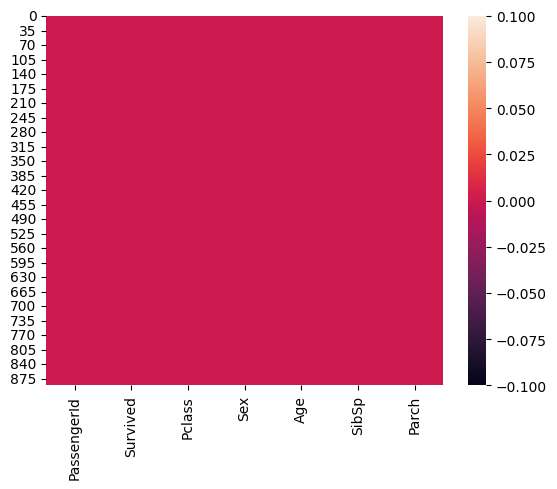

In [70]:
sns.heatmap(df.isnull())

# data analysis

In [71]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.544332,0.523008,0.381594
std,257.353842,0.486592,0.836071,0.477990,13.013778,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000


In [73]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033741,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.067809,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.335071,0.083081,0.018443
Sex,0.042939,-0.543351,0.131900,1.000000,0.082533,-0.114631,-0.245489
Age,0.033741,-0.067809,-0.335071,0.082533,1.000000,-0.232743,-0.176744
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232743,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.176744,0.414838,1.000000


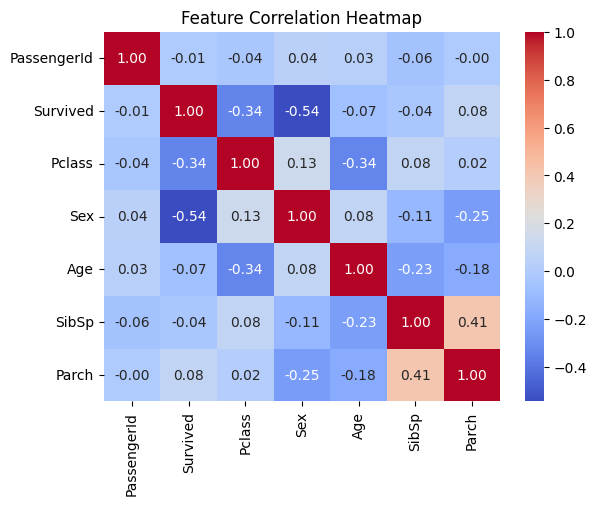

In [86]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [75]:
df.Survived.value_counts()

,count
Survived,
0,549
1,342


In [76]:
df.Sex.value_counts()

,count
Sex,
1,577
0,314


<Axes: ylabel='count'>

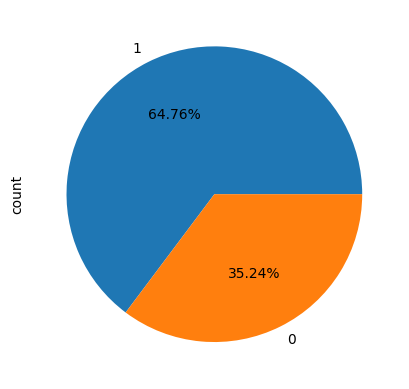

In [78]:
df.Sex.value_counts().plot.pie(autopct="%0.2f%%")

<Axes: xlabel='Sex', ylabel='count'>

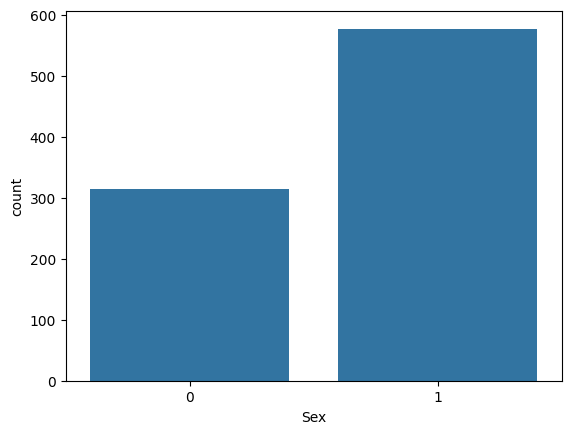

In [79]:
sns.countplot(x=df["Sex"])

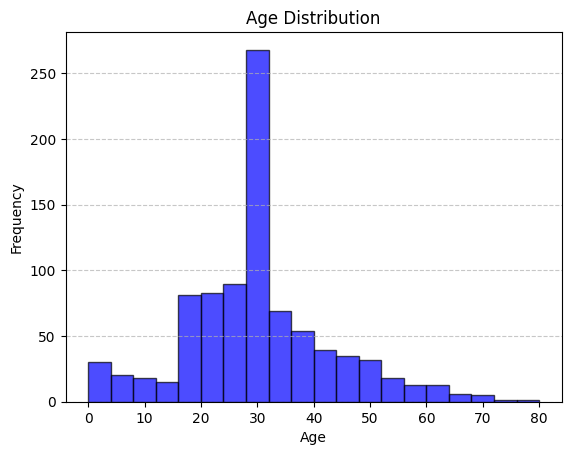

In [80]:
plt.hist(df['Age'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


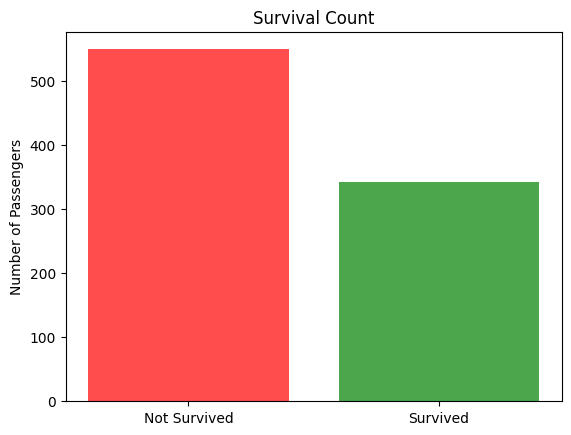

In [81]:
survived_counts = df['Survived'].value_counts()
plt.bar(['Not Survived', 'Survived'], survived_counts, color=['red', 'green'], alpha=0.7)
plt.title('Survival Count')
plt.ylabel('Number of Passengers')
plt.show()


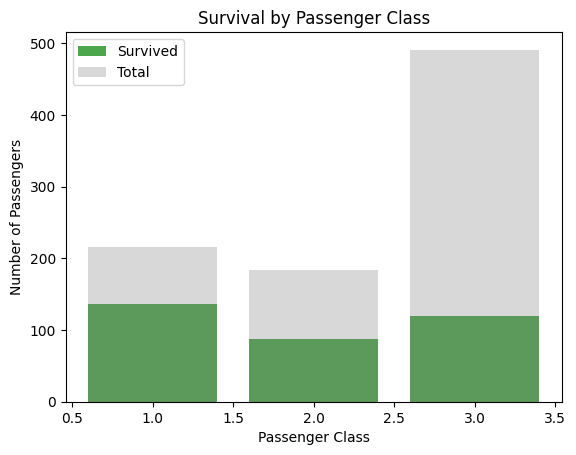

In [82]:
pclass_survived = df.groupby('Pclass')['Survived'].sum()
pclass_total = df['Pclass'].value_counts()
plt.bar(pclass_survived.index, pclass_survived.values, color='green', alpha=0.7, label='Survived')
plt.bar(pclass_total.index, pclass_total.values, color='gray', alpha=0.3, label='Total')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


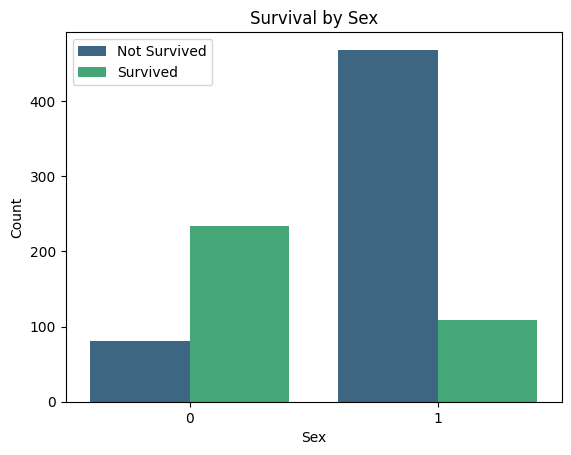

In [83]:
sns.countplot(x='Sex', hue='Survived', data=df, palette='viridis')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()


<ipython-input-84-ec005dce684c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette='Set2')


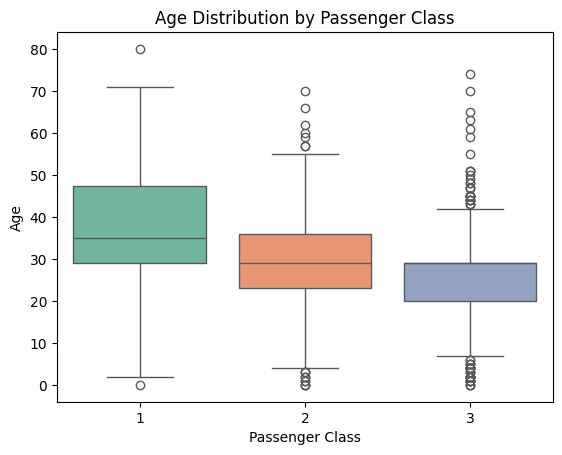

In [84]:
sns.boxplot(x='Pclass', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


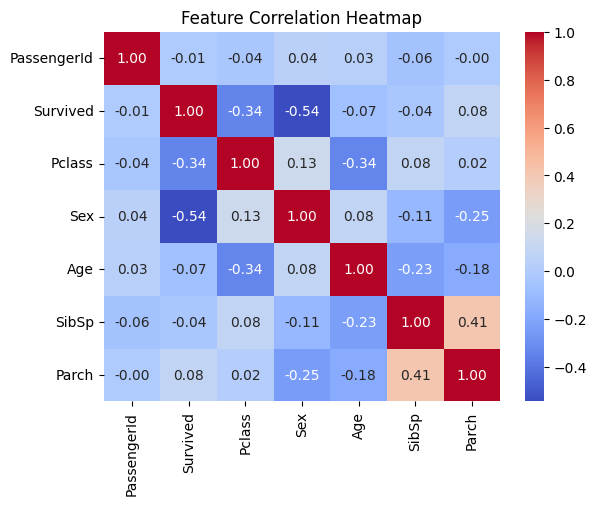

# Create model

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [88]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()
model4 = GradientBoostingClassifier()

model5 = XGBClassifier()
model6 = CatBoostClassifier()
model7 = LGBMClassifier()

In [90]:
x = df.drop("Survived",axis=1)
y = df.Survived

In [91]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.25,shuffle=True,
                                                  random_state=42)

In [103]:
accuracies = []

def model(model):
    model.fit(xtrain,ytrain)
    predict = model.predict(xtest)
    accuracy = accuracy_score(predict,ytest)
    # print("accuracy =",accuracy)
    accuracies.append(accuracy)

model(model1)
model(model2)
model(model3)
model(model4)

algorithms = ["LogisticRegression", "RandomForestClassifier", "DecisionTreeClassifier", "GradientBoostingClassifier"]
new = pd.DataFrame({"algorithms": algorithms, "accuracies": accuracies})
new

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,algorithms,accuracies
0,LogisticRegression,0.807175
1,RandomForestClassifier,0.838565
2,DecisionTreeClassifier,0.748879
3,GradientBoostingClassifier,0.811659


In [97]:
model(model5)

accuracy = 0.7982062780269058


In [98]:
model(model6)

Learning rate set to 0.008672
0:	learn: 0.6876439	total: 1.95ms	remaining: 1.95s
1:	learn: 0.6819641	total: 2.93ms	remaining: 1.46s
2:	learn: 0.6765237	total: 3.91ms	remaining: 1.3s
3:	learn: 0.6713493	total: 4.58ms	remaining: 1.14s
4:	learn: 0.6664717	total: 5.5ms	remaining: 1.09s
5:	learn: 0.6607025	total: 6.34ms	remaining: 1.05s
6:	learn: 0.6561574	total: 6.86ms	remaining: 973ms
7:	learn: 0.6514104	total: 7.75ms	remaining: 961ms
8:	learn: 0.6469234	total: 8.31ms	remaining: 916ms
9:	learn: 0.6422428	total: 8.94ms	remaining: 885ms
10:	learn: 0.6391511	total: 9.42ms	remaining: 847ms
11:	learn: 0.6347957	total: 10.4ms	remaining: 854ms
12:	learn: 0.6303150	total: 11.2ms	remaining: 853ms
13:	learn: 0.6263234	total: 11.9ms	remaining: 840ms
14:	learn: 0.6215092	total: 13.2ms	remaining: 865ms
15:	learn: 0.6174347	total: 14.5ms	remaining: 891ms
16:	learn: 0.6151049	total: 14.9ms	remaining: 864ms
17:	learn: 0.6113279	total: 15.6ms	remaining: 852ms
18:	learn: 0.6081230	total: 16.5ms	remaining: 

In [99]:
model(model7)

[LightGBM] [Info] Number of positive: 253, number of negative: 415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 299
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378743 -> initscore=-0.494889
[LightGBM] [Info] Start training from score -0.494889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [129]:
modelx = RandomForestClassifier(max_depth= 3, max_features= "sqrt", n_estimators=300)
modelx.fit(xtrain,ytrain)
prex = modelx.predict(xtest)
accuracy_score(prex,ytest)


0.8340807174887892

In [130]:
acc = accuracy_score(ytest, prex)
print(f'Accuracy: {acc}')

cm = confusion_matrix(ytest, prex)
print(f'Confusion Matrix: \n{cm}')

cr = classification_report(ytest, prex)
print(f'Classification Report: \n{cr}')

Accuracy: 0.8340807174887892
Confusion Matrix: 
[[124  10]
 [ 27  62]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       134
           1       0.86      0.70      0.77        89

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



In [131]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(modelx, f)